In [2]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

Automatically created module for IPython interactive environment


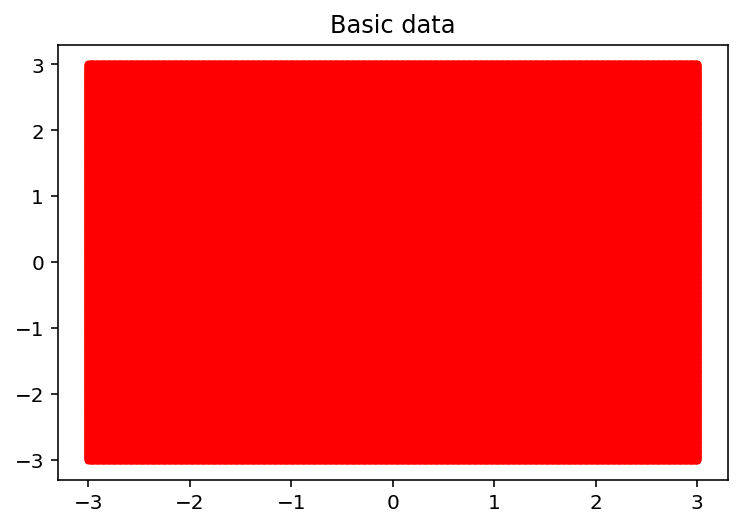

In [7]:
# 一句话解释numpy.meshgrid()——生成网格点坐标矩阵。
xx, yy = np.meshgrid(np.linspace(-3, 3, 500),
                     np.linspace(-3, 3, 500))

plt.figure(dpi=16*9)
plt.plot(xx, yy,
         color='red',  # 全部点设置为红色
         marker='.',  # 点的形状为圆点
         linestyle='')
plt.title("Basic data")
plt.show()

np.random.seed(0)
X = np.random.randn(300, 2) # 300*2
Y = np.logical_xor(X[:, 0] > 0, X[:, 1] > 0) # 将X两列求异或

In [8]:
clf = svm.NuSVC(gamma='auto') #gamma是核函数系数
clf.fit(X, Y)

NuSVC(break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
      decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
      max_iter=-1, nu=0.5, probability=False, random_state=None, shrinking=True,
      tol=0.001, verbose=False)

In [9]:
# plot the decision function for each datapoint on the grid
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()]) #按行连接两个矩阵
Z = Z.reshape(xx.shape)

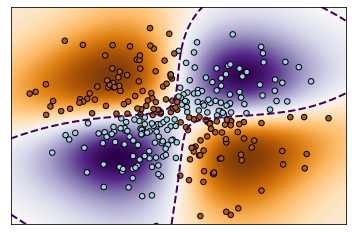

In [10]:
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()), aspect='auto',
           origin='lower', cmap=plt.cm.PuOr_r)
contours = plt.contour(xx, yy, Z, levels=[0], linewidths=2,
                       linestyles='dashed')
plt.scatter(X[:, 0], X[:, 1], s=30, c=Y, cmap=plt.cm.Paired,
            edgecolors='k')
plt.xticks(())
plt.yticks(())
plt.axis([-3, 3, -3, 3])
plt.show()

SVM 等价于求一个分离超平面y(w*x + b)
求一个凸二次规划问题，求得w和b，其中sigma是松弛变量，为了将硬间隔转化为软间隔，为松弛加上罚项C来衡量这种松弛的程度
RBF = exp(-gama * ||xi-xj||^2)
径向基对gama和C很敏感


In [1]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize

from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler # 通过减去均值并除以单位方差来标准化数据
from sklearn.datasets import load_iris
from sklearn.model_selection import StratifiedShuffleSplit  # 用来分割数据
from sklearn.model_selection import GridSearchCV  # 详尽搜索估计器的指定参数值。

Automatically created module for IPython interactive environment


In [2]:
# Utility function to move the midpoint of a colormap to be around
# the values of interest.

class MidpointNormalize(Normalize):

    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(value, x, y))


In [3]:
iris = load_iris()
X = iris.data
y = iris.target



In [4]:
# 决策函数可视化所需参数：
X_2d = X[:, :2] #取出前两列，即两个特征值作为训练数据
X_2d = X_2d[y > 0] #取出y>0的数据，即只有两个分类：1，2
y_2d = y[y > 0]
y_2d -= 1

In [5]:
# 数据归一化处理：z = (x - u) / s   u为均值，s为方差
scaler = StandardScaler() # fit求均值方差，transform求归一化数据
X = scaler.fit_transform(X)
X_2d = scaler.fit_transform(X_2d)
print(X)

[[-9.00681170e-01  1.01900435e+00 -1.34022653e+00 -1.31544430e+00]
 [-1.14301691e+00 -1.31979479e-01 -1.34022653e+00 -1.31544430e+00]
 [-1.38535265e+00  3.28414053e-01 -1.39706395e+00 -1.31544430e+00]
 [-1.50652052e+00  9.82172869e-02 -1.28338910e+00 -1.31544430e+00]
 [-1.02184904e+00  1.24920112e+00 -1.34022653e+00 -1.31544430e+00]
 [-5.37177559e-01  1.93979142e+00 -1.16971425e+00 -1.05217993e+00]
 [-1.50652052e+00  7.88807586e-01 -1.34022653e+00 -1.18381211e+00]
 [-1.02184904e+00  7.88807586e-01 -1.28338910e+00 -1.31544430e+00]
 [-1.74885626e+00 -3.62176246e-01 -1.34022653e+00 -1.31544430e+00]
 [-1.14301691e+00  9.82172869e-02 -1.28338910e+00 -1.44707648e+00]
 [-5.37177559e-01  1.47939788e+00 -1.28338910e+00 -1.31544430e+00]
 [-1.26418478e+00  7.88807586e-01 -1.22655167e+00 -1.31544430e+00]
 [-1.26418478e+00 -1.31979479e-01 -1.34022653e+00 -1.44707648e+00]
 [-1.87002413e+00 -1.31979479e-01 -1.51073881e+00 -1.44707648e+00]
 [-5.25060772e-02  2.16998818e+00 -1.45390138e+00 -1.31544430e

In [11]:
C_range = np.logspace(-2, 10, 13)
gamma_range = np.logspace(-9, 3, 13)
param_grid = dict(gamma=gamma_range, C=C_range)
cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42) #打乱数据
grid = GridSearchCV(SVC(), param_grid=param_grid, cv=cv)
# 用于调整SVC中的超参数C和gamma，分别赋值为其他值，注意需要用字典序列导入，定义数据的处理方法，并能设置多线程
grid.fit(X, y)  # 训练分类器

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=5, random_state=42, test_size=0.2,
            train_size=None),
             error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04, 1.e+05,
       1.e+06, 1.e+07, 1.e+08, 1.e+09, 1.e+10]),
                         'gamma': array([1.e-09, 1.e-08, 1.e-07, 1.e-06, 1.e-05, 1.e-04, 1.e-03, 1.e-02,
       1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=

In [12]:
print("The best parameters are %s with a score of %0.2f"
      % (grid.best_params_, grid.best_score_))



The best parameters are {'C': 1.0, 'gamma': 0.1} with a score of 0.97


In [13]:
# Now we need to fit a classifier for all parameters in the 2d version
# (we use a smaller set of parameters here because it takes a while to train)

C_2d_range = [1e-2, 1, 1e2]
gamma_2d_range = [1e-1, 1, 1e1]
classifiers = []
for C in C_2d_range:
    for gamma in gamma_2d_range:
        clf = SVC(C=C, gamma=gamma)
        clf.fit(X_2d, y_2d)
        classifiers.append((C, gamma, clf))

[[0.61333333 0.84666667 0.84       0.84       0.84       0.84
  0.84       0.82666667 0.84666667 0.92       0.76666667 0.46666667
  0.4       ]
 [0.61333333 0.84666667 0.84       0.84       0.84       0.84
  0.84       0.82666667 0.84666667 0.94666667 0.76666667 0.46666667
  0.4       ]
 [0.61333333 0.84666667 0.84       0.84       0.84       0.84
  0.84       0.86666667 0.96666667 0.94666667 0.87333333 0.52666667
  0.42      ]
 [0.61333333 0.84666667 0.84       0.84       0.84       0.84
  0.87333333 0.96666667 0.94666667 0.94       0.87333333 0.54
  0.45333333]
 [0.61333333 0.84666667 0.84       0.84       0.84       0.87333333
  0.96666667 0.94       0.94       0.92       0.87333333 0.54
  0.45333333]
 [0.61333333 0.84666667 0.84       0.84       0.87333333 0.96
  0.94666667 0.95333333 0.92666667 0.92       0.87333333 0.54
  0.45333333]
 [0.61333333 0.84666667 0.84       0.87333333 0.96       0.94666667
  0.95333333 0.93333333 0.92666667 0.92       0.87333333 0.54
  0.45333333]
 [0.

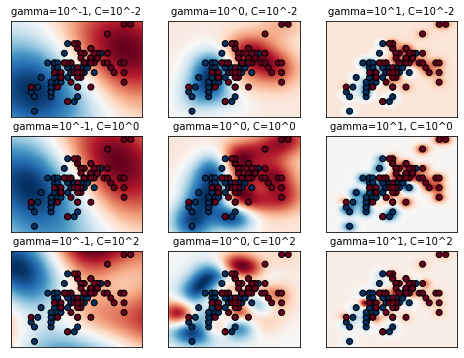

In [18]:
# #############################################################################
# Visualization
#
# draw visualization of parameter effects

plt.figure(figsize=(8, 6))
xx, yy = np.meshgrid(np.linspace(-3, 3, 200), np.linspace(-3, 3, 200)) # 得到绘图网格200*200
for (k, (C, gamma, clf)) in enumerate(classifiers):
    # k为序列号，对应了特别的模型，以及其中的C和gamma
    # 求样本的决策函数点，decision_function表示通过度量样本距离分隔超平面距离的来表示置信度。
    # 那么我们是不是可以使用decision_function的置信度来计算ROC呢？答案当然是可以的啦。
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()]) # 40000*2
    Z = Z.reshape(xx.shape)

    # visualize decision function for these parameters
    plt.subplot(len(C_2d_range), len(gamma_2d_range), k + 1)
    plt.title("gamma=10^%d, C=10^%d" % (np.log10(gamma), np.log10(C)),
              size='medium')

    # visualize parameter's effect on decision function
    plt.pcolormesh(xx, yy, -Z, cmap=plt.cm.RdBu)
    plt.scatter(X_2d[:, 0], X_2d[:, 1], c=y_2d, cmap=plt.cm.RdBu_r,
                edgecolors='k')
    plt.xticks(())
    plt.yticks(())
    plt.axis('tight')

scores = grid.cv_results_['mean_test_score'].reshape(len(C_range),
                                                     len(gamma_range))
print(scores)

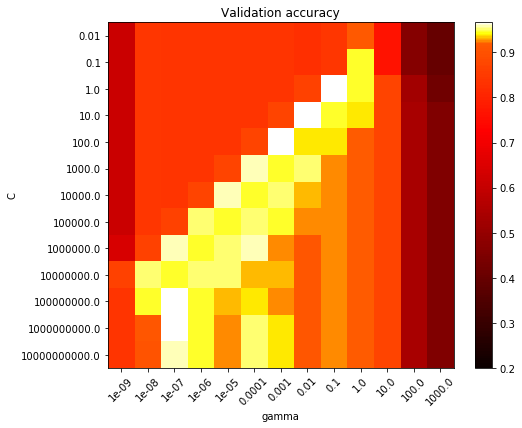

In [19]:
plt.figure(figsize=(8, 6))
plt.subplots_adjust(left=.2, right=0.95, bottom=0.15, top=0.95)
plt.imshow(scores, interpolation='nearest', cmap=plt.cm.hot,
           norm=MidpointNormalize(vmin=0.2, midpoint=0.92))
plt.xlabel('gamma')
plt.ylabel('C')
plt.colorbar()
plt.xticks(np.arange(len(gamma_range)), gamma_range, rotation=45)
plt.yticks(np.arange(len(C_range)), C_range)
plt.title('Validation accuracy')
plt.show()

接下来是多种SVM的核函数的多分类对比




In [1]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets


def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

Automatically created module for IPython interactive environment


In [2]:
iris = datasets.load_iris()
# 只是用其中的两个特征
X = iris.data[:, :2]
y = iris.target


In [3]:
C = 1.0  # 罚项
# 对比三种核函数以及线性SVM
c_models = (svm.SVC(kernel='linear', C=C),
          svm.LinearSVC(C=C, max_iter=10000),
          svm.SVC(kernel='rbf', gamma=0.7, C=C),
          svm.SVC(kernel='poly', degree=3, gamma='auto', C=C))
models = (clf.fit(X, y) for clf in c_models)

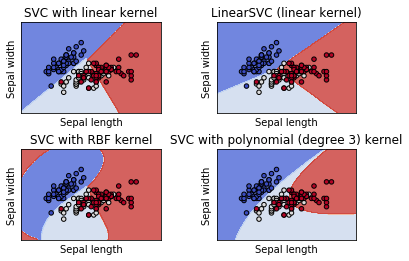

In [4]:
titles = ('SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel')

# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('Sepal length')
    ax.set_ylabel('Sepal width')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()
